# Create a statistical shape model based on wavelet transform and PCA.
The original paper is [here](https://ieeexplore.ieee.org/document/1199642)

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pywt import wavedec

## Load the data in the shape space.
TODO: 
* create a transformation between shape space and image space.

N=12, K=18


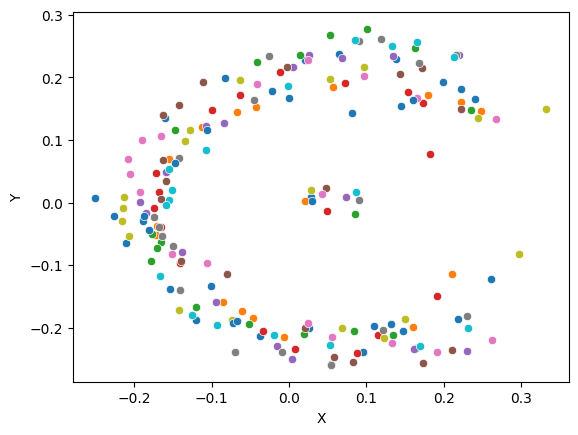

In [41]:
df = pd.read_csv('Landmarks_Aligned.csv', index_col=(0,1))
N = df.index.get_level_values('Shape').max()
K = df.index.get_level_values('Landmark').max()

fig, ax = plt.subplots()
for i in range(1,N):
    sns.scatterplot(data=df.loc[df.index.get_level_values('Shape')==i], x='X', y='Y', ax=ax)

print(f'{N=}, {K=}')

## Initiate the algorithm
Each of the $N$ elements of the list is a shape, defined by $K$ landmark points.
$U_n$ is the list of $x$ coordinates of the landmarks, $V_n$ is the list of $y$ coordinates of the landmarks. 

In [53]:
# Separate the data into x and y coordinates
Un, Vn = np.zeros((K,N)), np.zeros((K,N))
for iShape in range(1,N+1):
    un = df.loc[df.index.get_level_values('Shape')==iShape].X.to_numpy()
    vn = df.loc[df.index.get_level_values('Shape')==iShape].Y.to_numpy()
    Un[:,iShape-1] = un
    Vn[:,iShape-1] = vn

print(f'{Un.shape=}, {Vn.shape=}')

Un.shape=(18, 12), Vn.shape=(18, 12)


Apply the Wavelet transform to the data. Each columns of $U_n$ and $V_n$ corresponds to a shape, hence $axis=0$.

In [52]:
P = 4 # The level of decomposition
W = wavedec(Un, wavelet='db1', level=P, axis=0)
W[1]

array([[-0.17307193, -0.01922669, -0.14449704,  0.00075086, -0.13049288,
        -0.03823732, -0.04856981, -0.18650785, -0.16618127, -0.17386379,
        -0.01861756, -0.04490627],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])